<a href="https://colab.research.google.com/github/BRCInc-dev/Data-Analysis-Tools/blob/main/Tiesines_regresijos_pagrindai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
file_path = 'data.advertising.csv'

In [ ]:
# Duomenų įkėlimas
data = pd.read_csv("advertising.csv")

In [ ]:
# Duomenų formos patikrinimas
print(data.shape)

(200, 4)


In [ ]:
# Duomenų tipų patikrinimas
print(data.dtypes)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [ ]:
# Trūkstamų reikšmių patikrinimas
#Pateikia informacija apie duomen7 rinkin7
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [ ]:
#funkcija grąžina trūkstamų reikšmių skaičių kiekviename stulpelyje

print(data.isnull().sum())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
# Pašalinti eilutes su trūkstamomis reikšmėmis:
data.dropna(inplace=True)


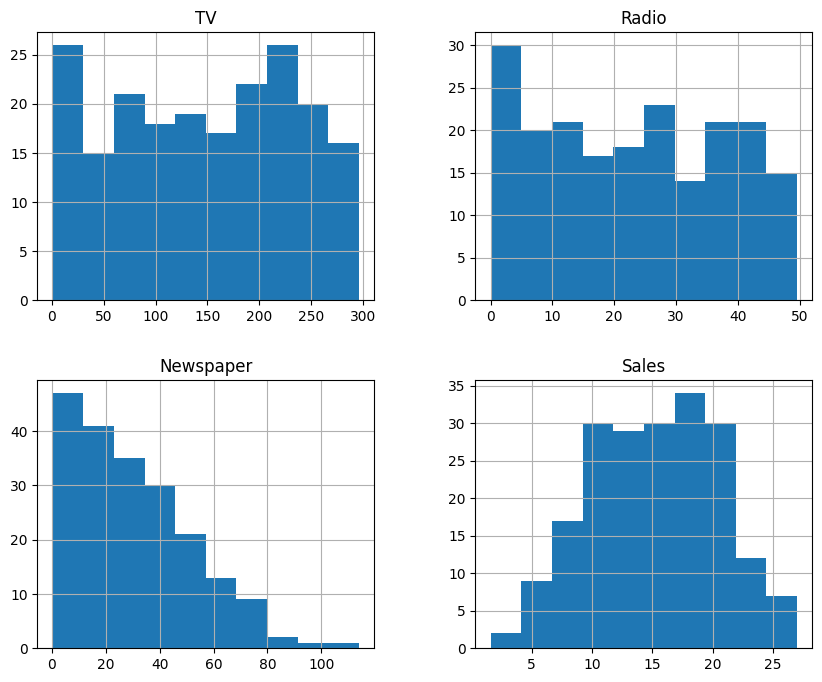

In [ ]:
# Duomenų vizualizacija ir grafikai

# Histogramos
data.hist(figsize=(10, 8))
plt.show()

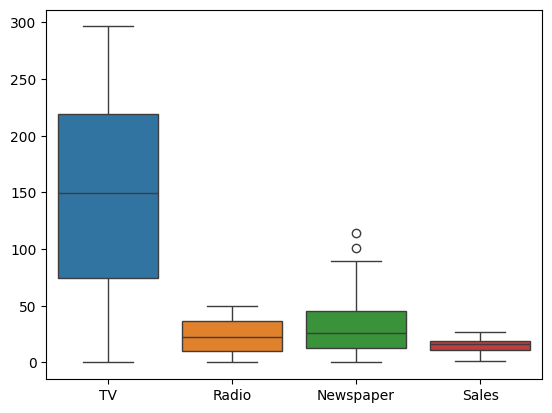

In [ ]:
# Boxplot
sns.boxplot(data=data)
plt.show()

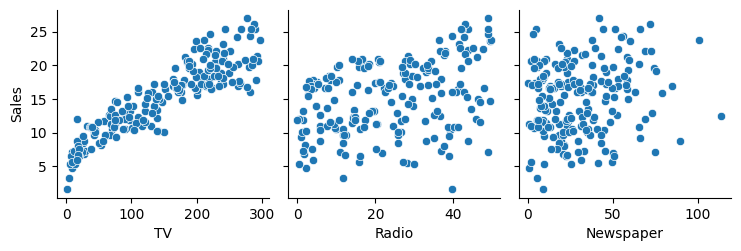

In [ ]:
# Scatter plot
sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales")
plt.show()


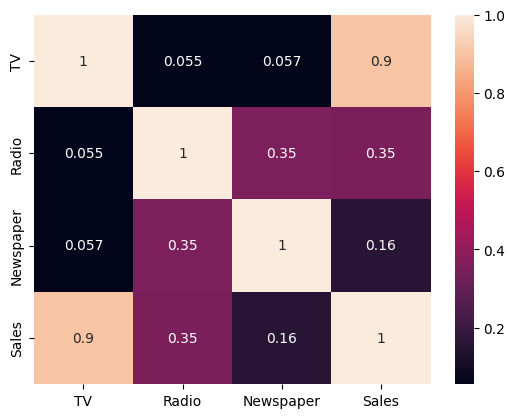

In [ ]:
# Koreliacijos matrica
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
#Kritinė stebinių masė: Histogramos ir scatter plot diagramos rodo,
#kur yra daugiausia stebėjimų.

#Išskirtys: Boxplot diagramos rodo išskirtis
#(reikšmes, kurios yra labai nutolusios nuo kitų).

In [ ]:
# 3. Koreliacijos ir multikolinearumo analizė

!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF skaičiavimas
X = data[["TV", "Radio", "Newspaper"]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Importuojame variance_inflation_factor iš statsmodels bibliotekos.
# Apskaičiuojame VIF kiekvienam kintamajam.
# Didelės VIF reikšmės (dažniausiai virš 5 arba 10)
# rodo multikolinearumo problemą.

     feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [ ]:
data.dropna(inplace=True)

In [ ]:
import statsmodels.formula.api as sm

# Modelio sudarymas
model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=data).fit()

# Rezultatų santrauka
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           8.13e-99
Time:                        17:43:41   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

In [ ]:
#Rezultatų analizė:

##P-value:

# Remiantis modelio rezultatais, TV ir Radio kintamieji yra
# statistiškai reikšmingi (p-value < 0.05), o Newspaper kintamasis nėra
# statistiškai reikšmingas (p-value > 0.05).

##Koeficientai:

## TV: 0.047537.
#Tai reiškia, kad padidinus TV reklamos biudžetą 1 tūkst. dolerių,
#pardavimai padidės 0.0475 tūkst. vienetų.

## Radio: 0.188530.
#Tai reiškia, kad padidinus radijo reklamos biudžetą 1 tūkst. dolerių,
# pardavimai padidės 0.1885 tūkst. vienetų.

## Newspaper: -0.001037.
#Tai reiškia, kad padidinus laikraščių reklamos biudžetą 1 tūkst. dolerių,
#pardavimai sumažės 0.0010 tūkst. vienetų.


# Pasikliautiniai intervalai:
# Pasikliautiniai intervalai rodo koeficientų
# patikimumą. Kadangi Newspaper kintamojo pasikliautinas intervalas apima 0,
# tai reiškia, kad koeficientas gali būti lygus 0 ir kintamasis
# gali būti nereikšmingas.

# Kadangi Newspaper kintamasis nėra statistiškai reikšmingas,
# jį pašaliname iš modelio ir paleidžiame modelį iš naujo:


In [ ]:
# Modelio sudarymas be Newspaper kintamojo
model = sm.ols(formula="Sales ~ TV + Radio", data=data).fit()

# Rezultatų santrauka
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          2.39e-100
Time:                        17:43:41   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.0

In [ ]:
# 5. Modelio klaidų (residual errors) analizė

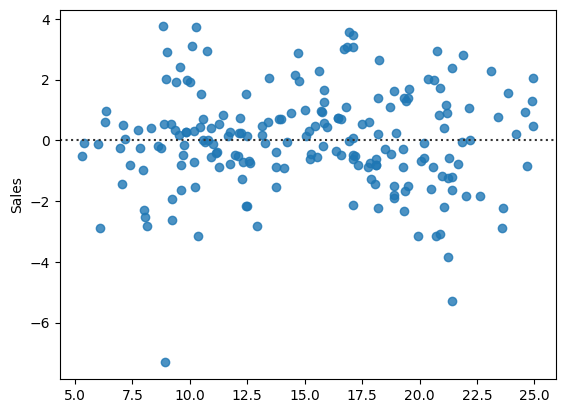

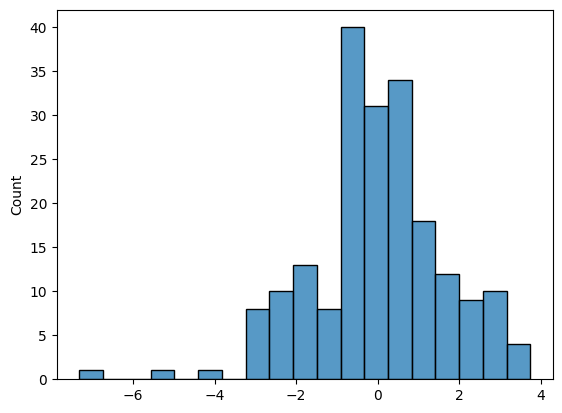

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Likučių diagrama
sns.residplot(x=model.predict(), y=data["Sales"])
plt.show()

# Likučių pasiskirstymo diagrama
sns.histplot(model.resid)
plt.show()

In [ ]:
# Klaidų analizė:

#Atsitiktines klaidos:
#Likučių diagrama rodo, kad klaidos yra atsitiktinai
#pasiskirstę aplink 0, tai rodo, kad modelis yra tinkamas.

# Tendencijos ar nehomogeniškumas:
# Likučių diagramoje nematyti tendencijų ar nehomogeniškumo.

#Normalus pasiskirstymas:
# Likučių pasiskirstymo diagrama rodo, kad likučiai pasiskirstę normaliai.

In [ ]:
## 6. Galutinė regresijos formulė
## 1. Pardavimai = 2.9211 + 0.0457 * TV + 0.1879 * Radio

# 2. Didžiausią įtaką darantys kintamieji:

# Remiantis koeficientais, Radio kintamasis daro didžiausią įtaką pardavimams,
# po to seka TV kintamasis.
# Newspaper kintamasis buvo pašalintas iš modelio,
# nes nebuvo statistiškai reikšmingas.

In [ ]:
# 7. Praktinis pritaikymas

#Koeficientų interpretavimas:


Koeficientų interpretavimas:

TV: Koeficientas yra 0.0457. Tai reiškia, kad padidinus TV reklamos biudžetą 1 tūkst. dolerių, pardavimai padidės 0.0457 tūkst. vienetų.
Radio: Koeficientas yra 0.1879. Tai reiškia, kad padidinus radijo reklamos biudžetą 1 tūkst. dolerių, pardavimai padidės 0.1879 tūkst. vienetų.
Newspaper: Kintamasis buvo pašalintas iš modelio, nes nebuvo statistiškai reikšmingas. Tai reiškia, kad investicijos į laikraščių reklamą neturės didelės įtakos pardavimams.
Rekomendacija:

Remiantis gautais rezultatais, rekomenduojama labiausiai investuoti į radijo reklamą, nes ji turi didžiausią įtaką pardavimams. Kiekvienas 1 tūkst. dolerių, investuotas į radijo reklamą, padidins pardavimus 0.1879 tūkst. vienetų.

TV reklama taip pat turi teigiamą poveikį pardavimams, tačiau jos įtaka yra mažesnė nei radijo reklamos. Todėl, jei yra ribotas biudžetas, rekomenduojama didesnę jo dalį skirti radijo reklamai.

Laikraščių reklama neturėtų būti prioritetas, nes ji nėra statistiškai reikšminga ir neturės didelės įtakos pardavimams.

```
# This is formatted as code
```

